# Machine Learning Introdução a classificação com SKLearn

## Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Módulo 1: Introdução a classificação

### Features de classificação ( 1 sim / 0 não)

#### pelo longo/curto
#### perna curta/longo
#### latido sim/não

### Código

In [2]:
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0] 

In [3]:
cachorro1 = [0, 1, 1]
cachorro2 = [1, 1, 1]
cachorro3 = [1, 1, 1] 

In [4]:
# Classes - 1 porco - 0 cachorro
# x de treino e y de treino
# dados prévios & classes/labels/etiquetas
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0] 

In [5]:
model = LinearSVC()
model.fit(treino_x, treino_y) 

LinearSVC()

In [6]:
animal_misterioso = [1, 1, 1]
model.predict([animal_misterioso]) 

array([0])

In [7]:
misterio1 = [1, 1, 1] # pig
misterio2 = [1, 1, 0] # dog
misterio3 = [0, 1, 1] # pig - errou

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1] # valores verdadeiros do teste

previsoes = model.predict(teste_x) 
print(previsoes) 

[0 1 0]


In [8]:
corretos = (teste_y == previsoes).sum() 
total = len(teste_x)
taxa_acerto = corretos/total 
print('Taxa de acerto do teste: ' +  str(taxa_acerto.round(2)* 100))  

Taxa de acerto do teste: 67.0


In [9]:
taxa_acerto = accuracy_score(teste_y, previsoes)
print('Taxa de acerto do teste: ' +  str(taxa_acerto.round(2)* 100))  

Taxa de acerto do teste: 67.0


## Módulo 2: Testes replicáveis, estratificação

#### Dados

In [10]:
dados = pd.read_csv('tracking.csv')
dados.head() 

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [11]:
rotulos = ['principal', 'funcionamento', 'contato', 'comprado']
dados.columns = rotulos 

In [12]:
x = dados[['principal', 'funcionamento', 'contato']]
y = dados[['comprado']] 

In [13]:
dados.shape

(99, 4)

#### Sem uso de train_test_split

In [14]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:] 

In [15]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
taxa_acerto = accuracy_score(teste_y, previsoes)
print('Taxa de acerto do teste: ' +  str(taxa_acerto.round(2)* 100))  

Taxa de acerto do teste: 96.0


#### Usando train_test_split

In [17]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                             test_size = 0.25, 
                                                             random_state = 20, 
                                                             stratify = y) 
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x))) 

Treinaremos com 74 elementos e testaremos com 25 elementos


In [18]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y) 
previsoes = modelo.predict(teste_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
taxa_acerto = accuracy_score(teste_y, previsoes)
print('Taxa de acerto do teste: ' +  str(taxa_acerto.round(2)* 100))  

Taxa de acerto do teste: 96.0


In [20]:
treino_y.value_counts()

comprado
0           49
1           25
dtype: int64

## Módulo 3: Um projeto de baixa dimensionalidade e o baseline

### Tratamento

In [21]:
dados = pd.read_csv('mod3.csv')

In [22]:
rotulos = ['Nao_Terminado', 'Horas', 'Valor']
dados.columns = rotulos

In [23]:
troca = {0:1, 1:0}
dados['Finalizado'] = dados.Nao_Terminado.map(troca)
dados.drop('Nao_Terminado',axis = 1, inplace = True) 

<AxesSubplot:xlabel='Horas', ylabel='Valor'>

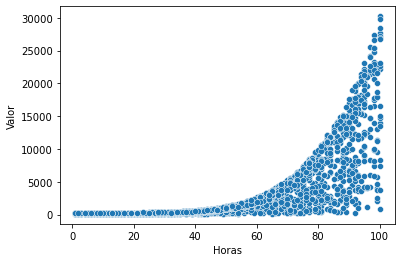

In [24]:
sns.scatterplot(x = 'Horas', y = 'Valor', data = dados) 

<AxesSubplot:xlabel='Horas', ylabel='Valor'>

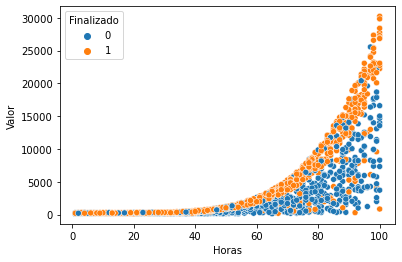

In [25]:
sns.scatterplot(x = 'Horas', y = 'Valor', data = dados, hue = 'Finalizado') 

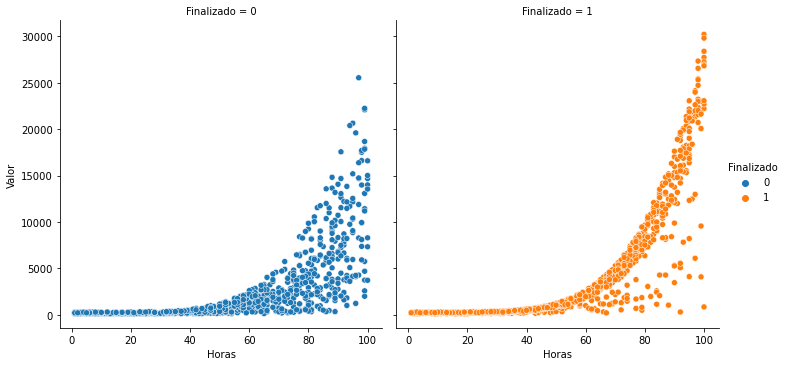

In [26]:
sns.relplot(x = 'Horas', y = 'Valor', data = dados, col = 'Finalizado', hue = 'Finalizado') 

### Modelagem

In [27]:
x = dados[['Horas', 'Valor']]
y = dados['Finalizado'] 

In [28]:
seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,random_state = seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x))) 

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [29]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y) 
previsoes = modelo.predict(teste_x) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print('Taxa de acerto do teste: ' +  str(taxa_acerto.round(2))) 

Taxa de acerto do teste: 47.41


In [31]:
previsoes_base = np.ones(540)
taxa_acerto = accuracy_score(teste_y, previsoes_base) * 100
print('Taxa de acerto do baseline: ' +  str(taxa_acerto.round(2)))  

Taxa de acerto do baseline: 52.59


### Curva de decisão - Decision Boundarie

<AxesSubplot:xlabel='Horas', ylabel='Valor'>

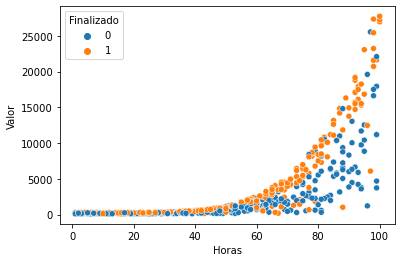

In [32]:
sns.scatterplot(x = 'Horas', y = 'Valor', hue = teste_y, data = teste_x) 

In [33]:
x_min = teste_x.Horas.min()
x_max = teste_x.Horas.max()
y_min = teste_x.Valor.min()
y_max = teste_x.Valor.max()
print(x_min, x_max, y_min, y_max) 

1 100 101 27738


In [34]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[(xx.ravel(), yy.ravel())] 

In [35]:
zezao = modelo.predict(pontos)
zezao = zezao.reshape(xx.shape) 

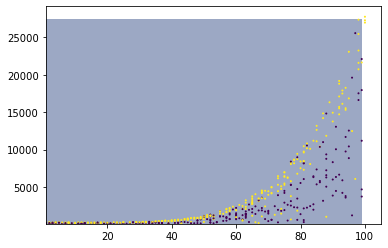

In [36]:
plt.contourf(xx, yy, zezao, alpha = 0.5)
plt.scatter(teste_x.Horas, teste_x.Valor, c = teste_y, s = 1) 